# Objective

The objective is to understand what factors influence the house prices in california and if we can make a linear model that can predict the median house price based on these factors.

# importing data and packages 

An initial exploration of the data is done using head() , info() and describe()

In [3]:

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('housing.csv')
df.dataframeName = 'housing.csv'
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Data preparation

In [5]:
# find what columns contain null values and interpolate using the mean of that column
nan_count = df.isnull().sum()
print(nan_count)

df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

nan_count = df.isnull().sum()
print(nan_count)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


/tmp/ipykernel_13/1929594565.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)


In [6]:
# add some additional variables based on the variables given. 
df['avg_pop_household'] = df['population'] / df['households']
df['avg_rooms_household'] = df['total_rooms'] / df['households']
df['avg_bedrooms_household'] = df['total_bedrooms'] / df['households']
# df = df[df['avg_pop_household']<10]
# df = df[df['avg_rooms_household']<50]
df = df[df['median_house_value']<500000]

In [7]:
# perform hot encoding to translate the categorical values into numerical.
def ocean_cat(value):
    if (value == '<1H OCEAN') or (value == 'ISLAND'):
        return 0.5
    elif (value == 'NEAR OCEAN') or (value == 'NEAR BAY'):
        return 1
    else:
        return 0

df['ocean_cat'] = df['ocean_proximity'].apply(ocean_cat)
        

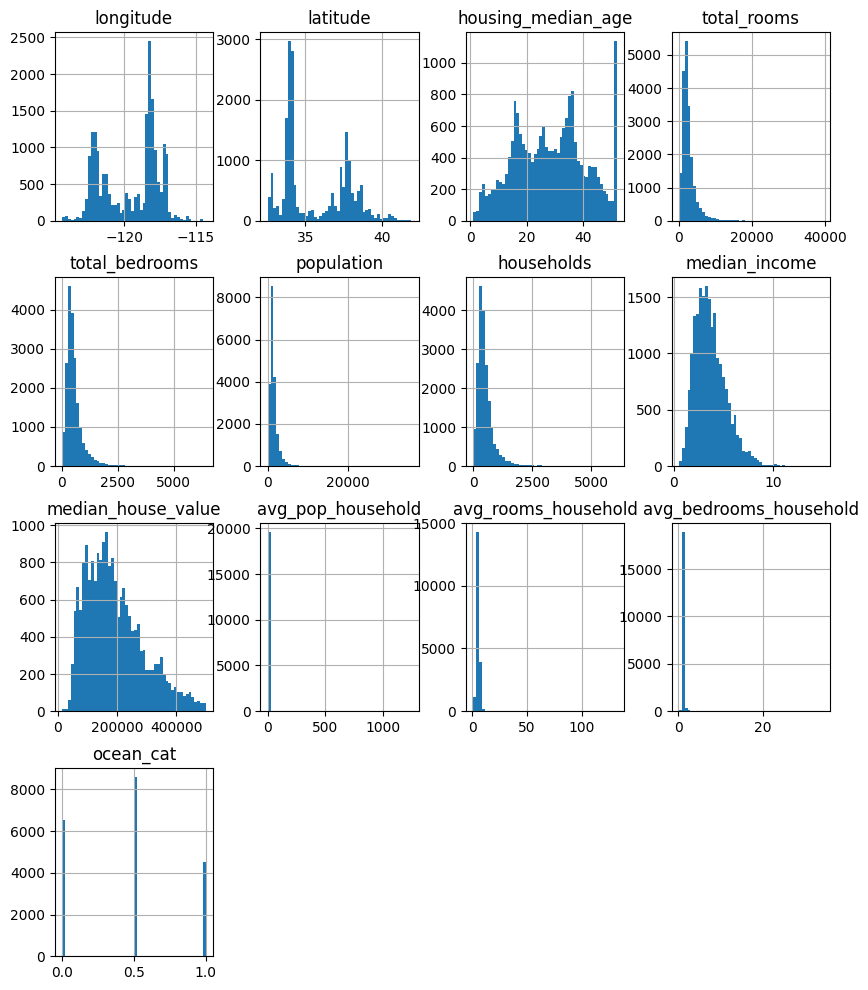

In [8]:

df.hist(bins=50,figsize=(10,12))
plt.show()

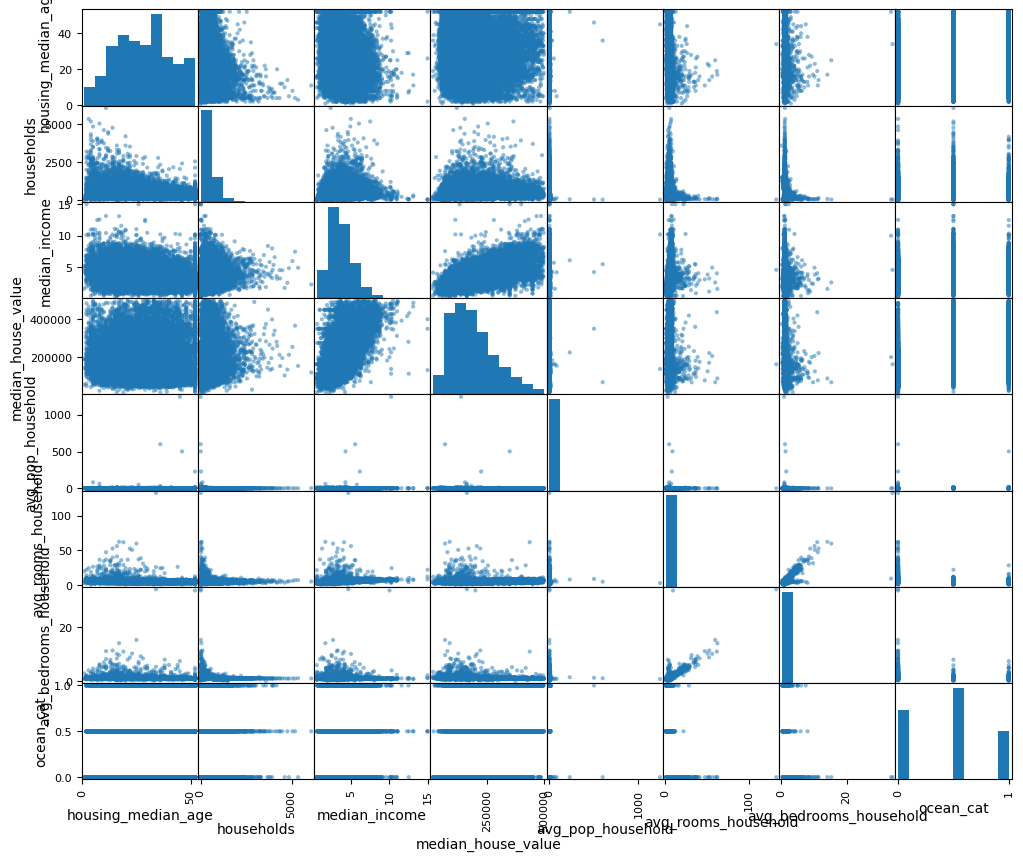

In [9]:
from pandas.plotting import scatter_matrix
df2 = df.drop(labels=['longitude','latitude','population','total_rooms','total_bedrooms'],axis=1)

scatter_matrix(df2, figsize=(12,10))
plt.show()

In [10]:
# find the most important variables using a correlation matrix
df_no_string = df.drop(['ocean_proximity'], axis=1)
corr_matrix = df_no_string.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value        1.000000
median_income             0.646719
ocean_cat                 0.441067
total_rooms               0.144988
avg_rooms_household       0.111581
households                0.095634
total_bedrooms            0.074822
housing_median_age        0.065139
population                0.013592
avg_pop_household        -0.021205
longitude                -0.045733
avg_bedrooms_household   -0.055915
latitude                 -0.149257
Name: median_house_value, dtype: float64

it seems median_income, ocean_cat, and total rooms are the most important variables

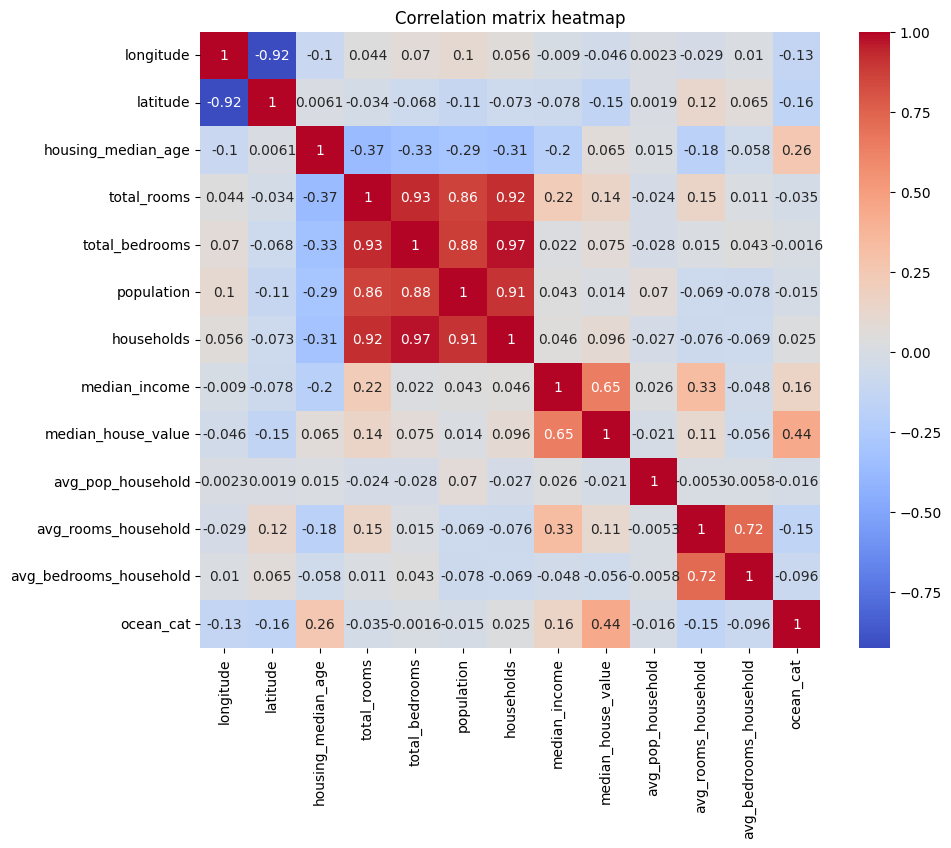

In [11]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix heatmap')
plt.show()

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_pop_household,avg_rooms_household,avg_bedrooms_household,ocean_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.555556,6.984127,1.023810,1.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2.109842,6.238137,0.971880,1.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.802260,8.288136,1.073446,1.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2.547945,5.817352,1.073059,1.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2.181467,6.281853,1.081081,1.0


# Modeling

In [13]:
X = df[['median_income','ocean_cat','total_rooms']]
y = df['median_house_value']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=3)

rf.fit(X_train,y_train)

y_pred_train = rf.predict(X_train)

y_pred_test = rf.predict(X_test)

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae_train = mean_absolute_error(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

# Evaluation

In [18]:
print(f"Mean Absolute Error on training data: {round(mae_train,1)}")
print(f"Mean Absolute Error on test data: {round(mae_test,1)}")

Mean Absolute Error on training data: 60083.2
Mean Absolute Error on test data: 59659.5


In [19]:
print(f"R² score on training data: {round(r2_train*100,1)}")
print(f"R² score on test data: {round(r2_test*100,1)}")

R² score on training data: 31.7
R² score on test data: 33.5


The accuracy of this model, based on the R2 values, is decent but not great